# Import libraries

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pickle import dump

# Import Data

In [13]:
# Read the previouly compressed data with pandas
df = pd.read_csv("/workspaces/EDA_4/data/processed/conditions_per_state.csv")
df.head()

,STATE_NAME,Physicians/10000,Primary Care Physicians/10000,Patient Care Primary Care Physicians/10000,General Surgeons/10000,Patient Care General Surgeons/10000,Median_Household_Income_2018,Percent of Population Aged 60+,anycondition_prevalence,Obesity_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence,Heart disease_prevalence
0,Alabama,217.1,77.2,71.2,7.6,6.9,43479.820896,23.861194,53.026866,38.273134,10.679104,16.232836,3.858209,9.616418
1,Alaska,276.9,112.8,105.6,9.6,8.5,64079.000000,17.985185,42.403704,32.048148,8.188889,11.970370,3.181481,7.448148
2,Arizona,242.0,78.1,73.2,6.9,6.1,49105.866667,26.046667,45.293333,32.160000,8.940000,13.040000,3.973333,9.000000
3,Arkansas,207.6,79.9,75.0,7.0,6.5,41801.373333,25.332000,50.680000,36.868000,10.697333,14.882667,3.789333,10.230667
4,California,279.6,96.2,87.1,7.2,6.2,67098.655172,23.184483,38.218966,27.813793,6.922414,11.325862,3.246552,6.901724


# Univariant Analisis

In [14]:
# Kowing the State Names are unique values it makes no sense to do an univariant analisis of them so we drop it for the further step
df_uni = df.drop('STATE_NAME', axis = 1)

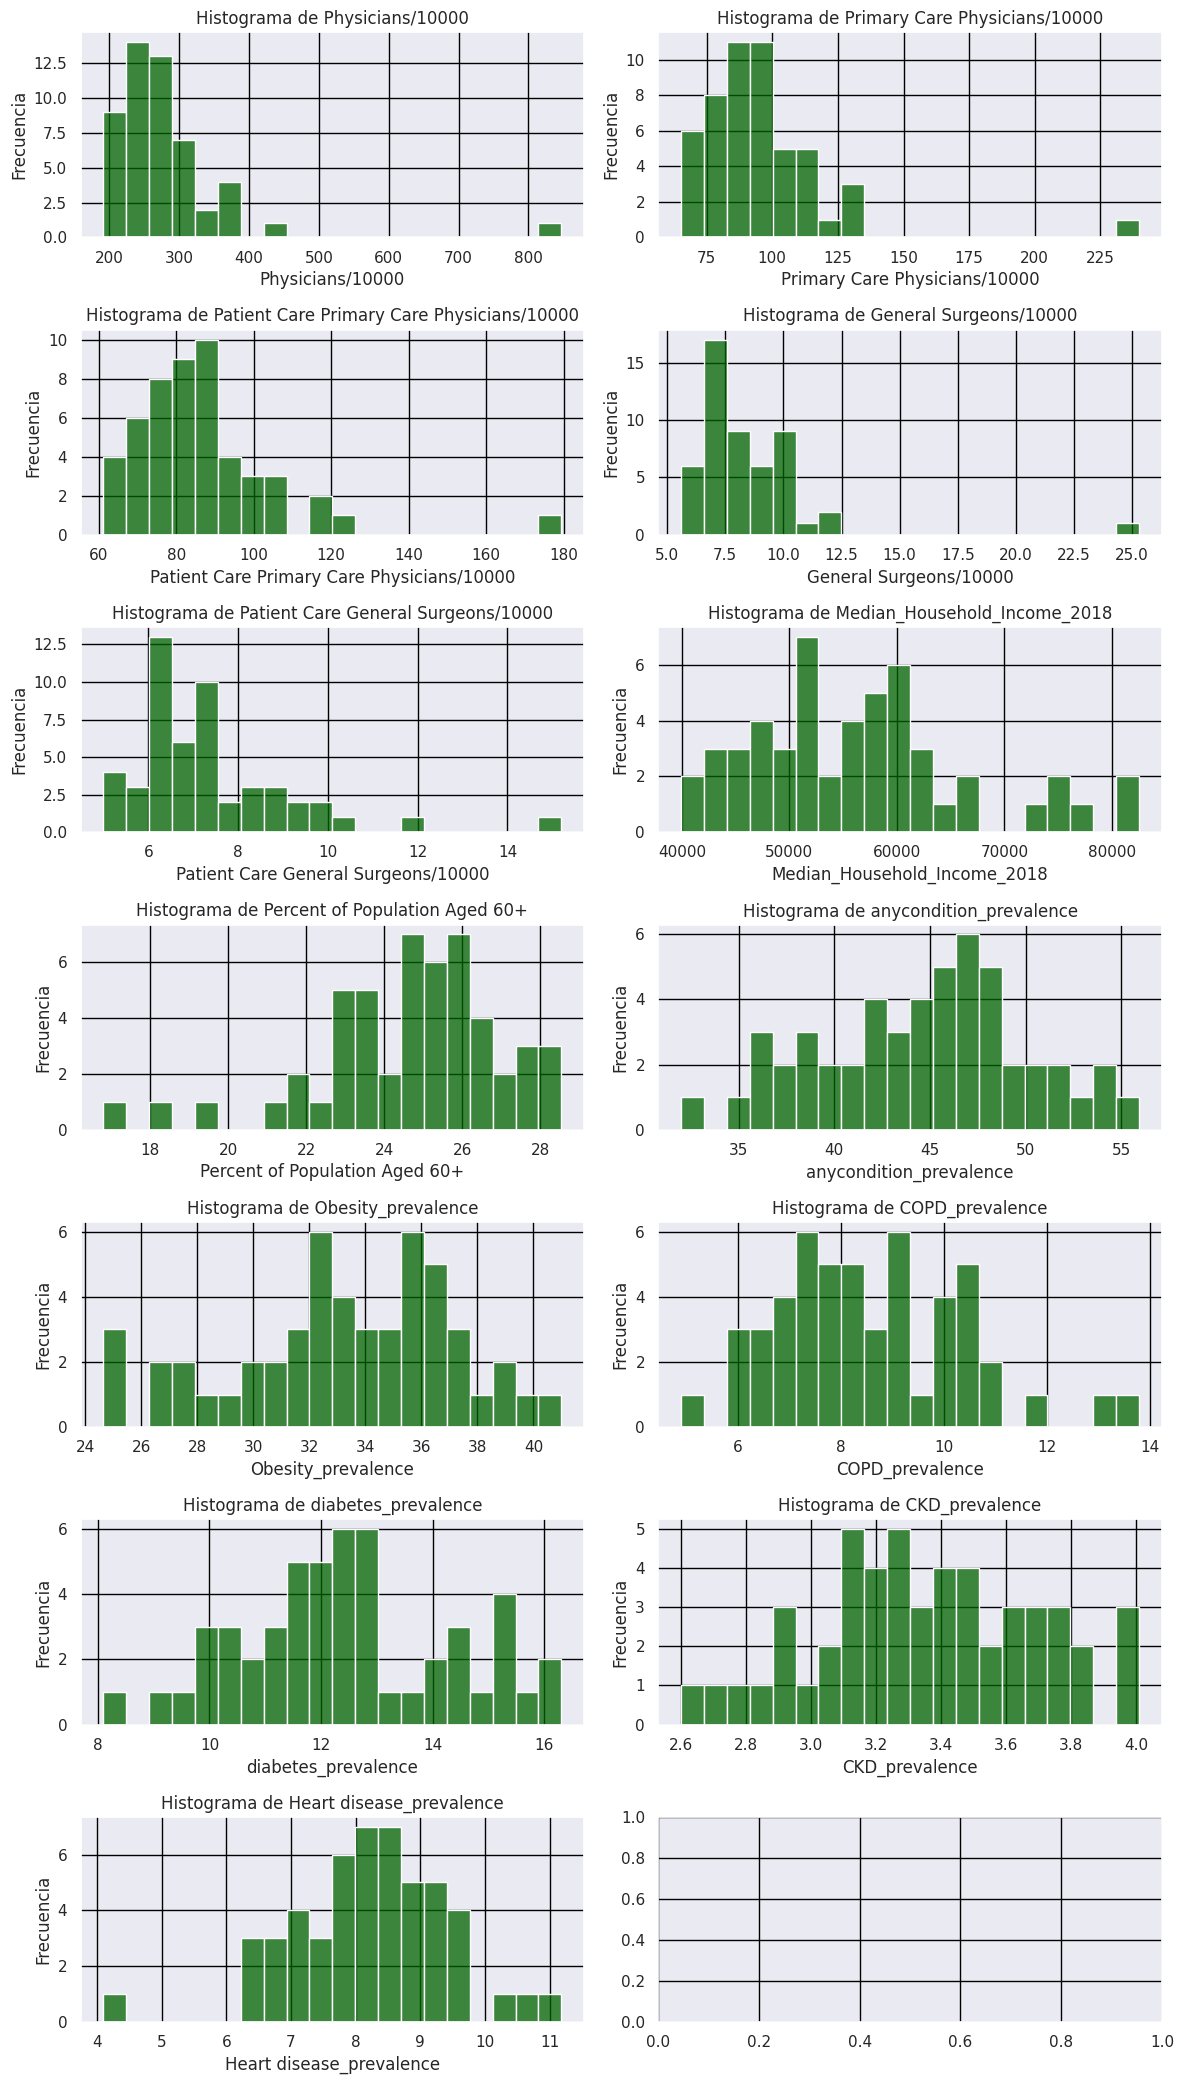

In [15]:
sns.set(rc={'axes.facecolor': '#eaeaf2', 'grid.color': 'black'})

# Obtener el número de columnas en el DataFrame
num_columns = len(df_uni.columns)

# Establecer el número de subgráficos por fila
num_subplots_per_row = 2

# Calcular el número total de filas necesarias
num_rows = (num_columns + num_subplots_per_row - 1) // num_subplots_per_row

# Crear subgráficos
fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(12, 3 * num_rows))

# Aplanar la matriz de subgráficos para facilitar la iteración
axes = axes.flatten()

# Iterar por cada columna y crear un histograma
for i, column in enumerate(df_uni.columns):
    ax = axes[i]
    sns.histplot(df[column], kde=False, bins=20, color='darkgreen', ax=ax)  # Puedes ajustar los parámetros según tus preferencias
    ax.set_title(f'Histograma de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

In [16]:
# Factorize the State Name because in the multivariant analisis it may be relevant
df["STATE_NAME"], tag_list = pd.factorize(df["STATE_NAME"])


# Multivariant Analisis

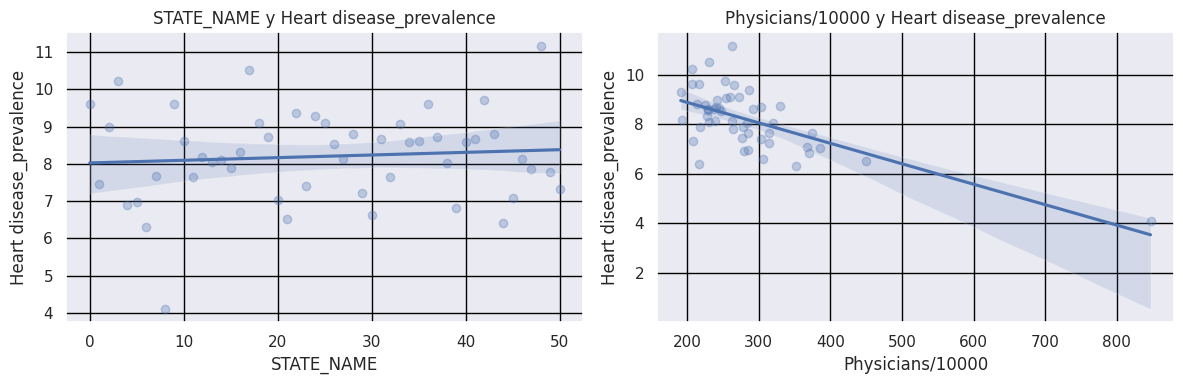

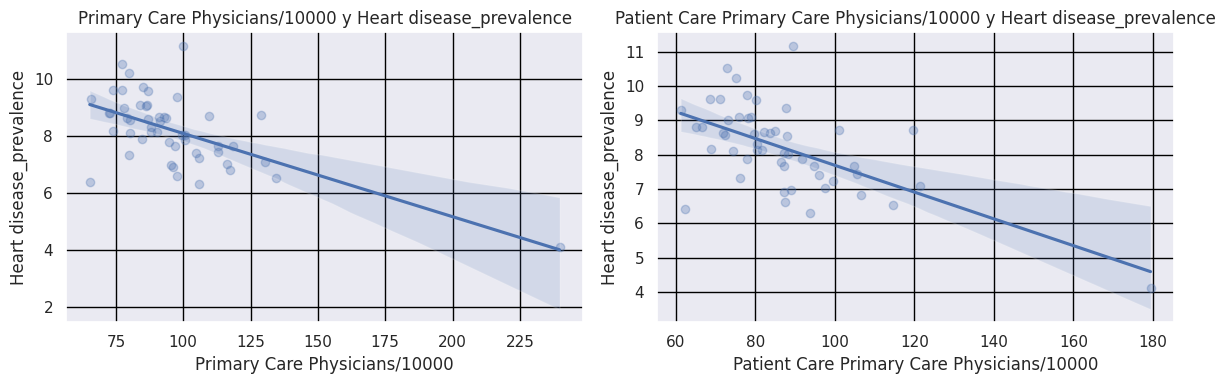

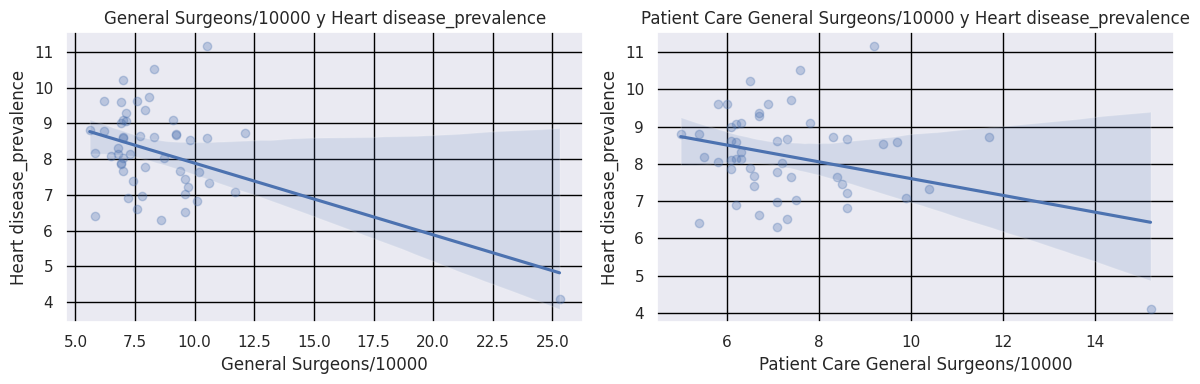

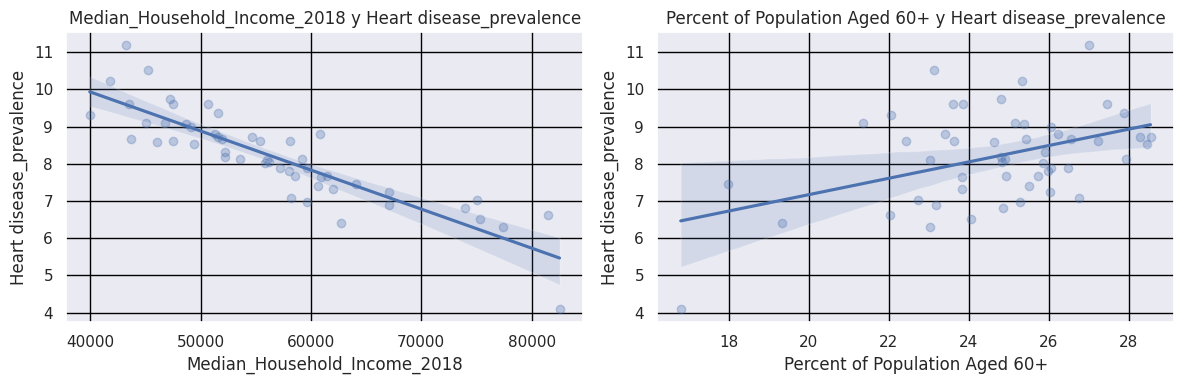

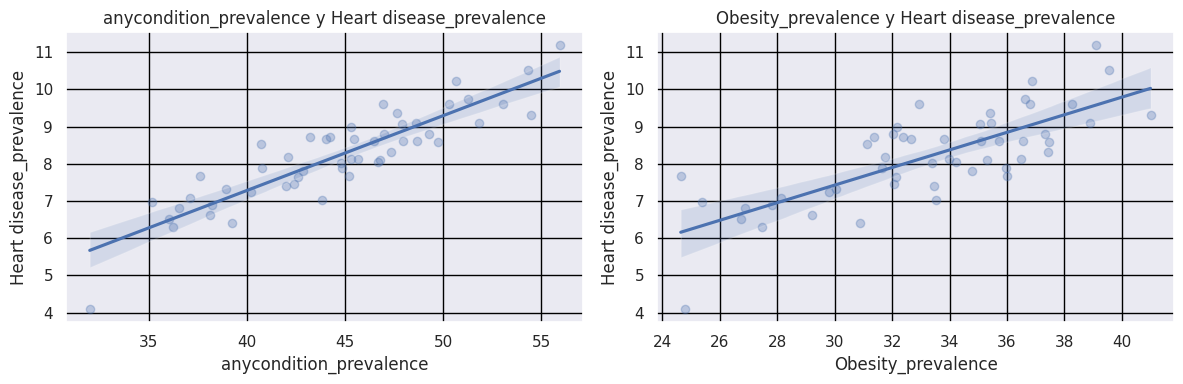

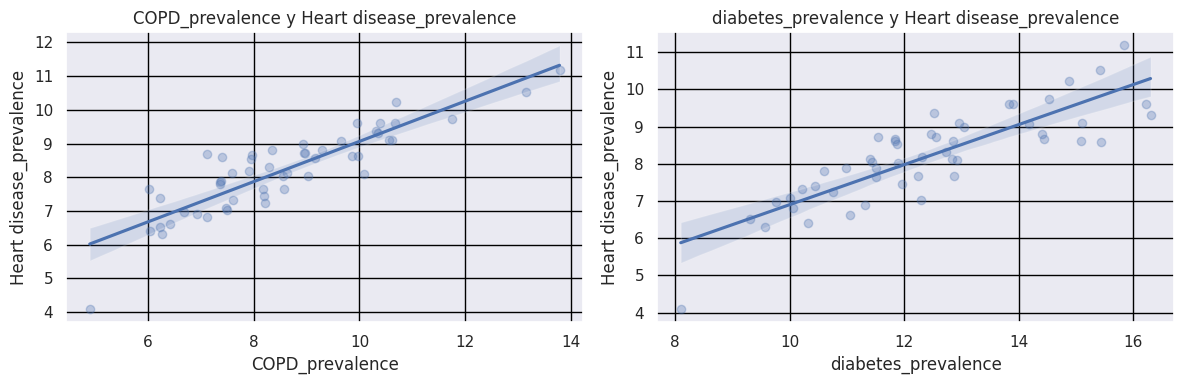

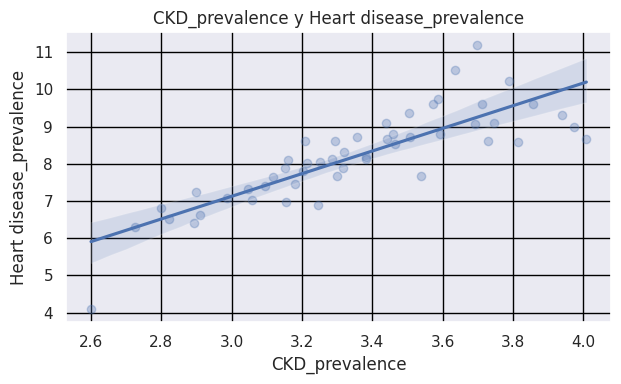

In [17]:
target_column = 'Heart disease_prevalence'

feature_columns = [col for col in df.columns if col != target_column]

# Dividir las columnas en pares
column_pairs = [(feature_columns[i], feature_columns[i+1]) if i+1 < len(feature_columns) else (feature_columns[i], None) for i in range(0, len(feature_columns), 2)]

# Iterar a través de los pares de columnas y trazar regplots
for pair in column_pairs:
    # Crear una figura con dos subgráficos
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Iterar sobre las dos columnas del par
    for i, feature_column in enumerate(pair):
        if feature_column is not None:
            # Crear un gráfico de dispersión con línea de regresión
            sns.regplot(x=feature_column, y=target_column, data=df, scatter_kws={'alpha':0.3}, ax=axes[i])
            
            # Configuración del título y etiquetas
            axes[i].set_title(f'{feature_column} y {target_column}')
            axes[i].set_xlabel(feature_column)
        else:
            # Si la columna es None, eliminar el segundo eje
            fig.delaxes(axes[i])
    
    # Ajustar el diseño y mostrar el gráfico
    plt.tight_layout()
    plt.show()

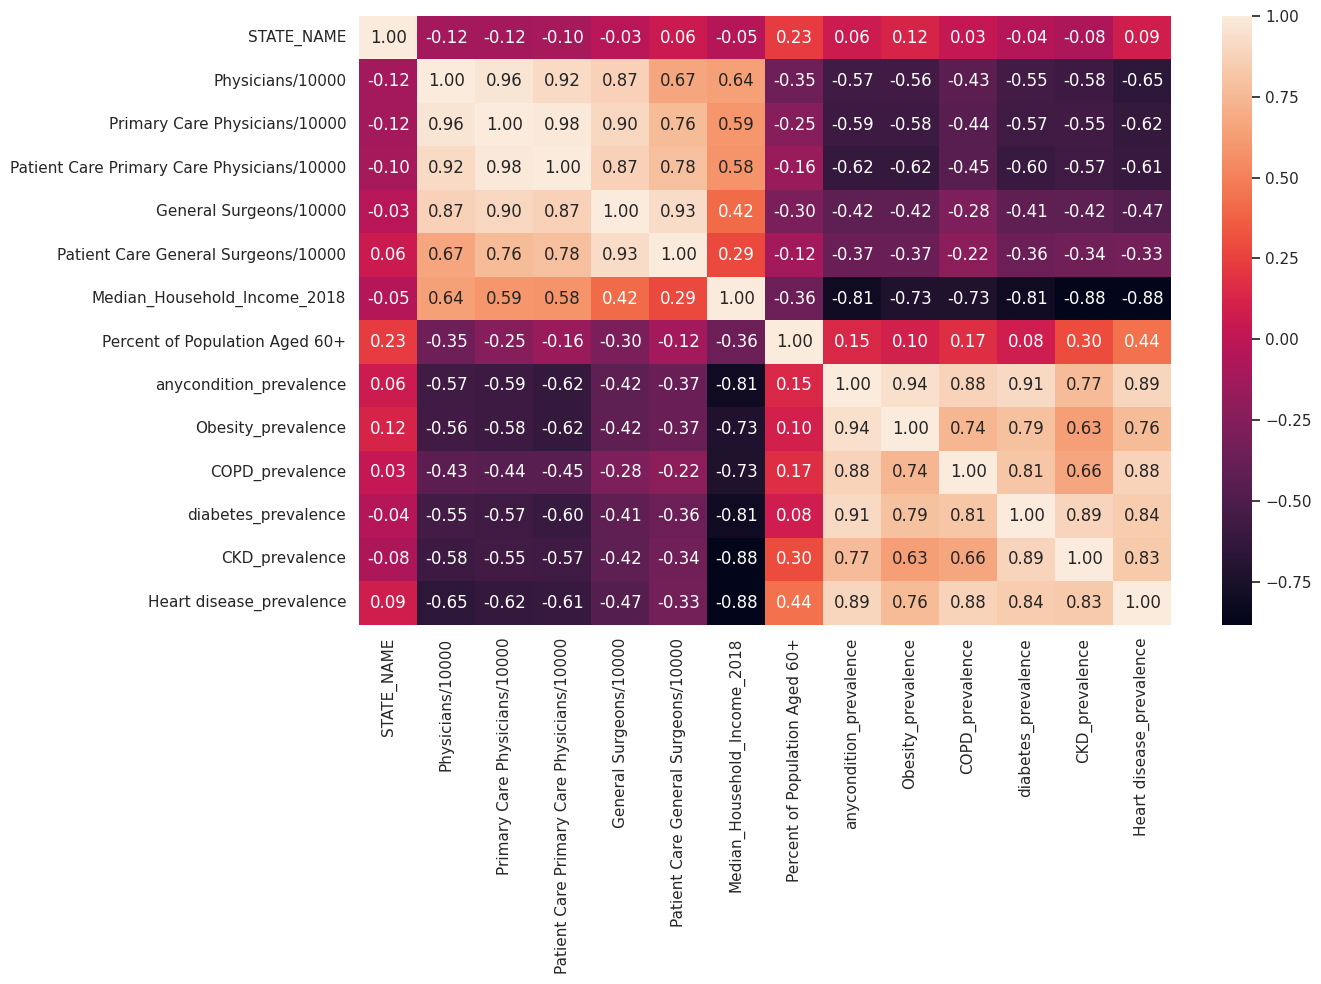

In [18]:
fig, axis = plt.subplots(figsize = (14, 10))
lista_de_columnas = df.columns.tolist()
sns.heatmap(df.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

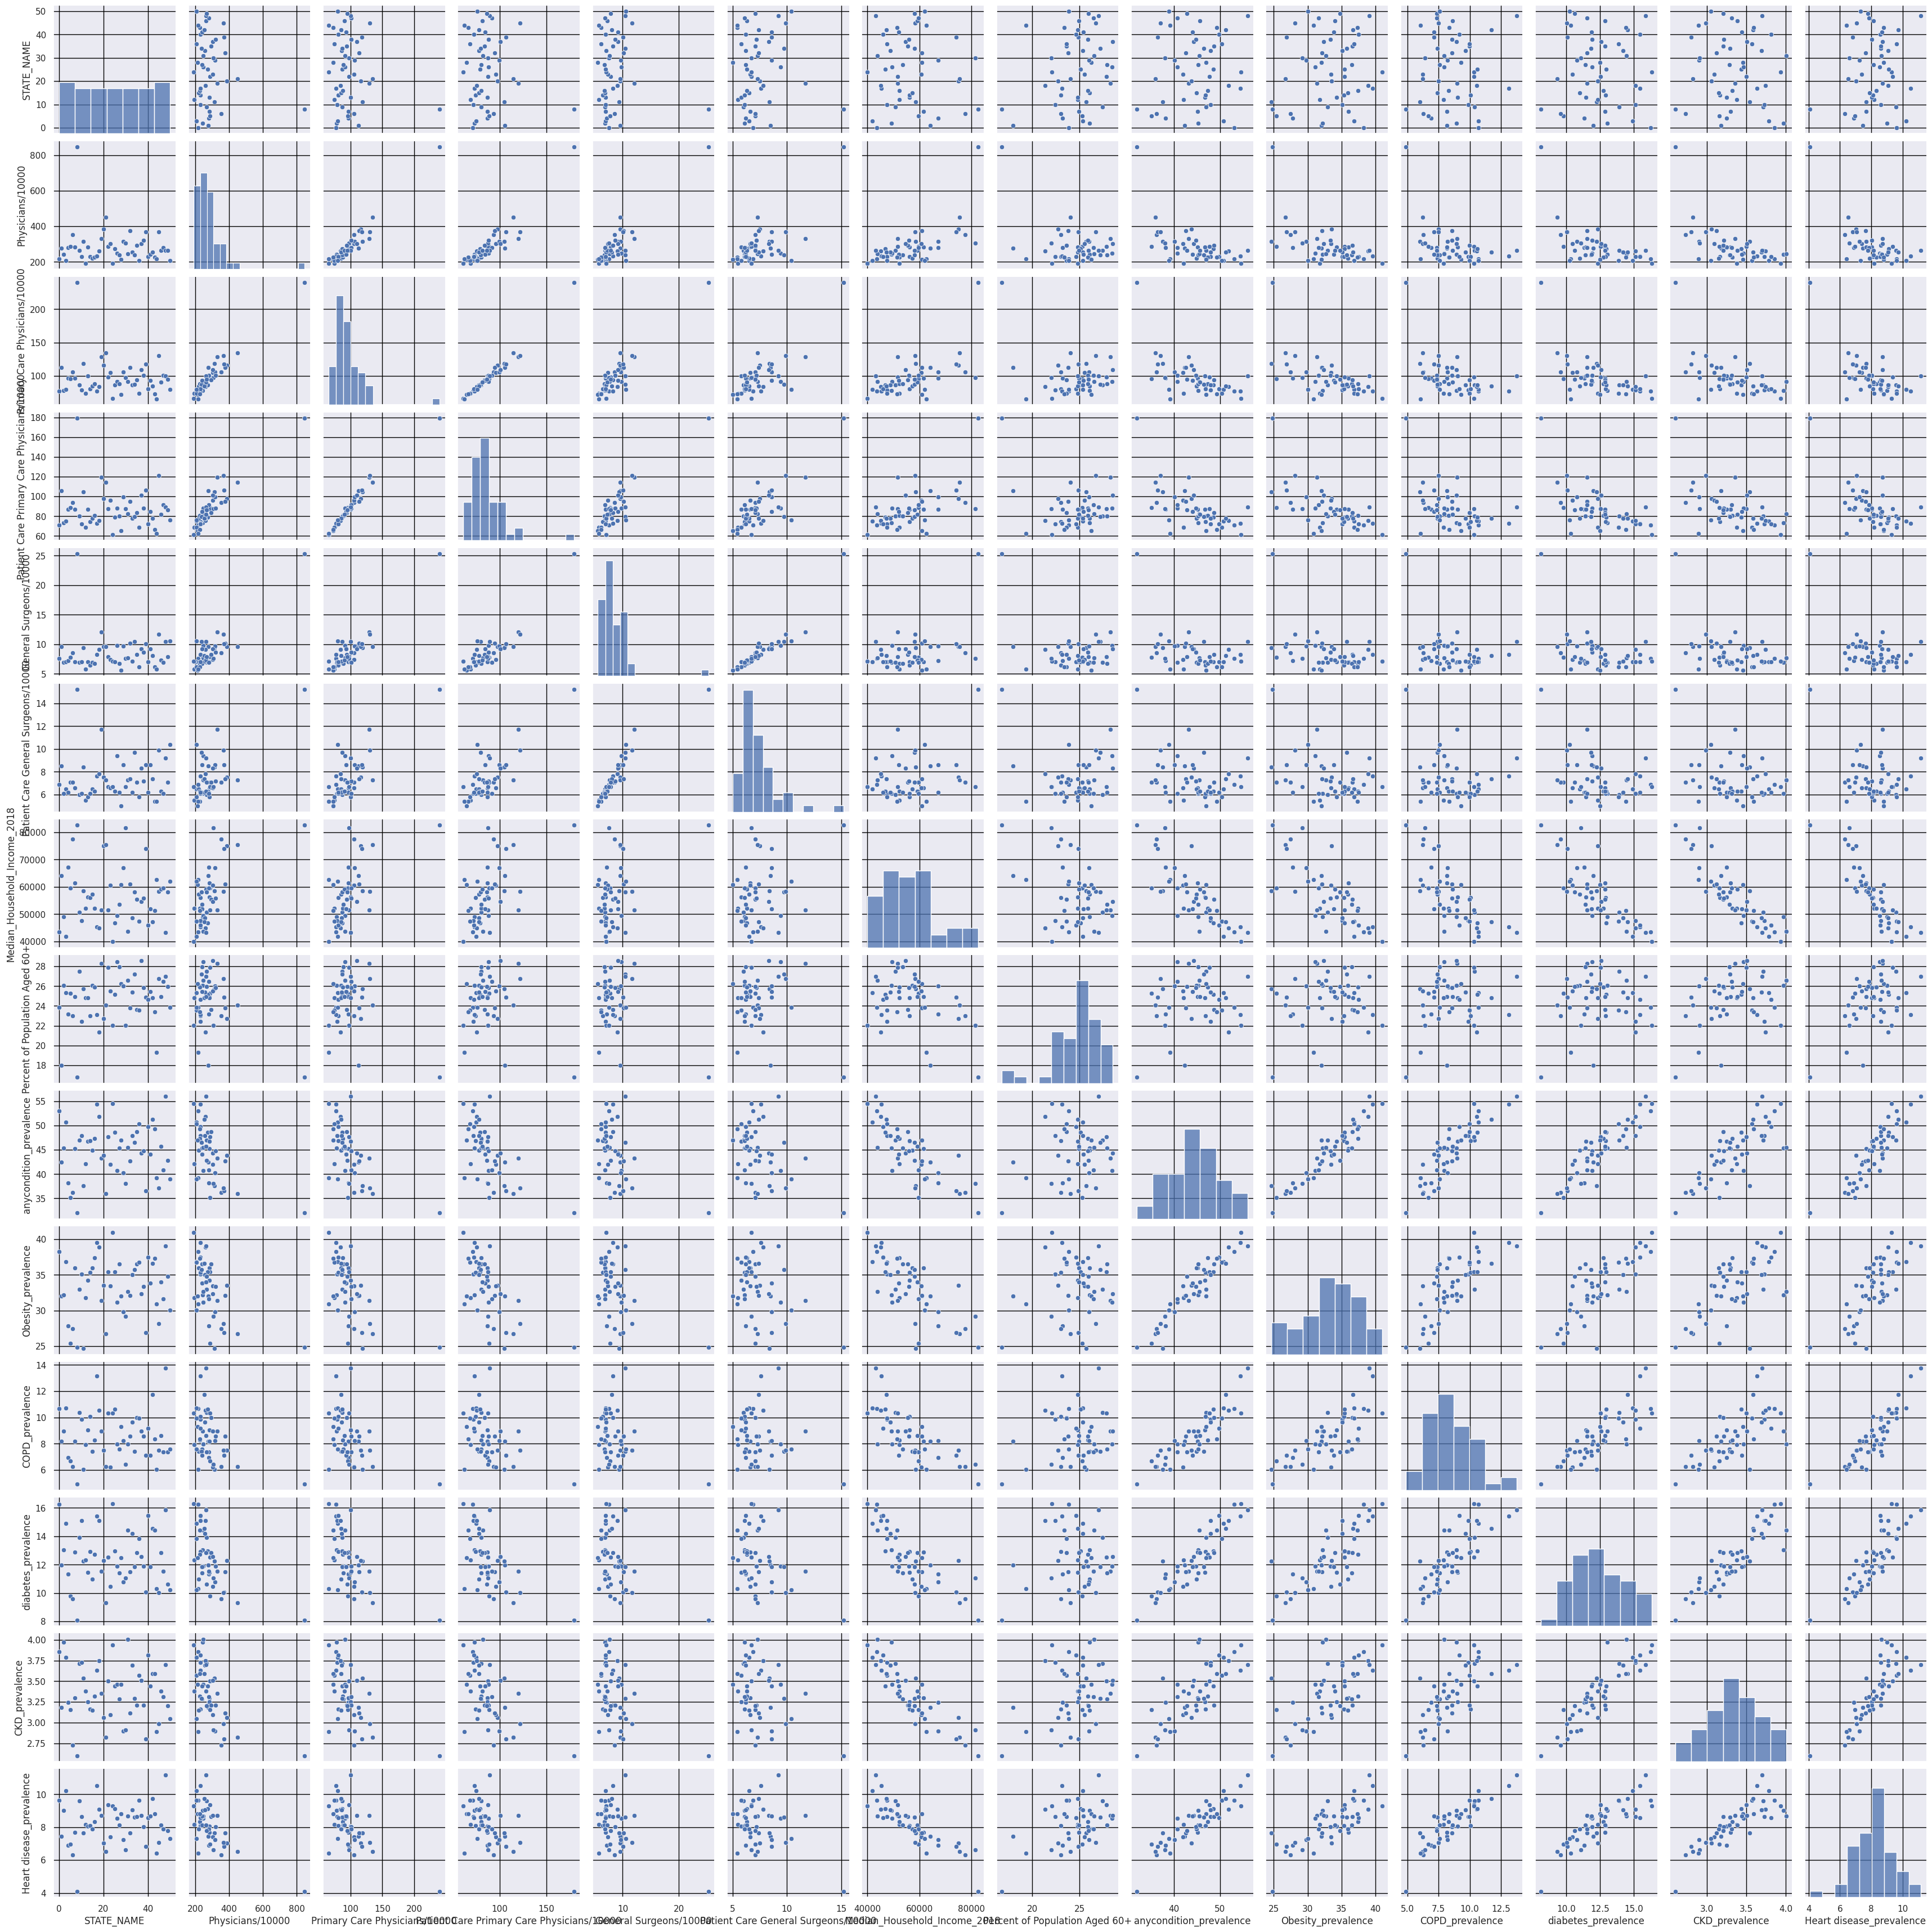

In [19]:
sns.pairplot(data = df)

# Outliers

In [20]:
df.describe().T.sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Median_Household_Income_2018,51.0,56443.872578,10266.643889,39932.719512,48898.753333,55861.895522,60857.734820,82533.000000
Physicians/10000,51.0,282.386275,97.435887,191.300000,230.150000,263.400000,303.050000,847.000000
Primary Care Physicians/10000,51.0,96.250980,26.097650,65.300000,80.200000,91.500000,102.850000,239.700000
Patient Care Primary Care Physicians/10000,51.0,86.760784,19.151492,61.200000,75.400000,83.700000,92.700000,179.400000
STATE_NAME,51.0,25.000000,14.866069,0.000000,12.500000,25.000000,37.500000,50.000000
anycondition_prevalence,51.0,44.583153,5.453419,32.000000,40.771543,45.200000,47.926481,55.930909
Obesity_prevalence,51.0,33.285587,3.976526,24.640000,31.246429,33.529167,36.248925,40.997561
General Surgeons/10000,51.0,8.433333,2.867380,5.600000,7.000000,7.700000,9.500000,25.300000
Percent of Population Aged 60+,51.0,24.697500,2.434465,16.800000,23.502559,24.933333,26.046061,28.544444
diabetes_prevalence,51.0,12.423432,1.930684,8.100000,11.189122,12.300000,13.873764,16.304878


<Axes: ylabel='Patient Care Primary Care Physicians/10000'>

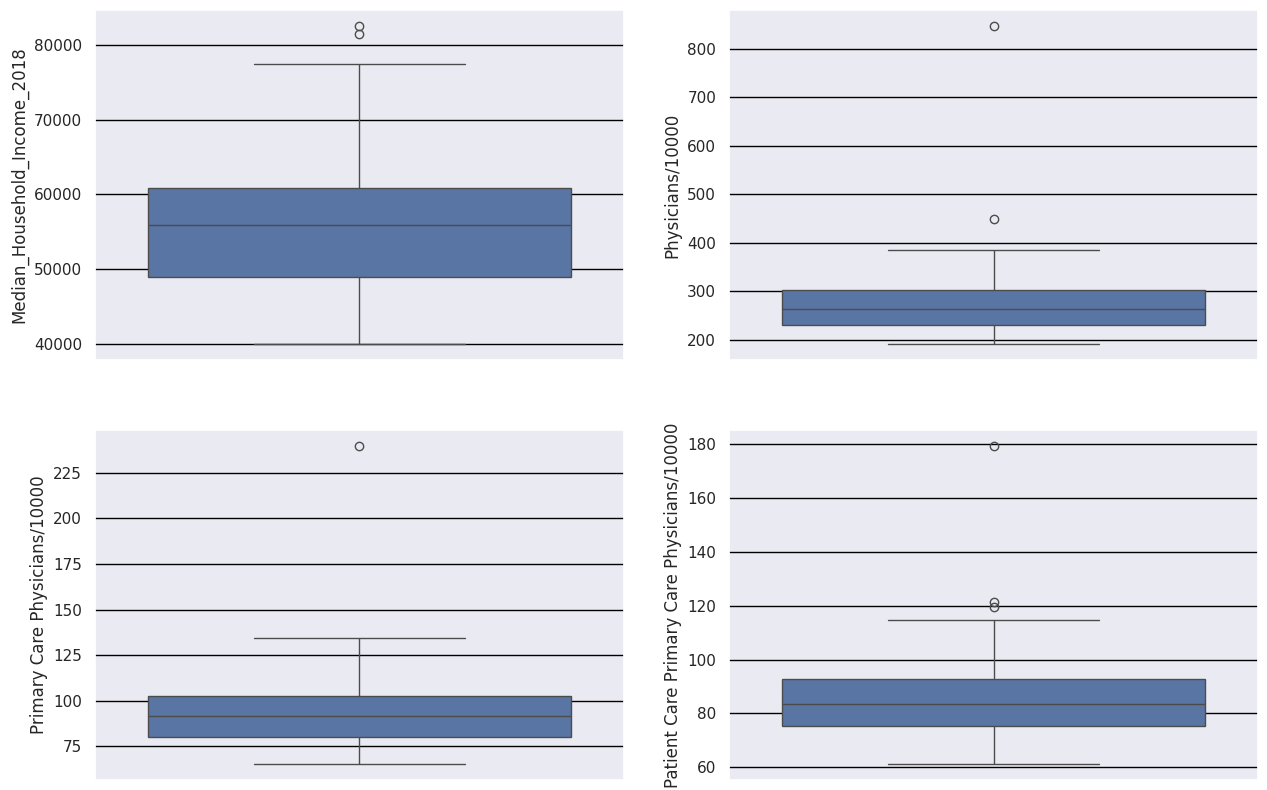

In [21]:
fig, axis = plt.subplots(2, 2, figsize = (15, 10))
sns.boxplot(ax = axis[0, 0], data = df, y = "Median_Household_Income_2018")
sns.boxplot(ax = axis[0, 1], data = df, y = "Physicians/10000")
sns.boxplot(ax = axis[1, 0], data = df, y = "Primary Care Physicians/10000")
sns.boxplot(ax = axis[1, 1], data = df, y = "Patient Care Primary Care Physicians/10000")

In [22]:
columns_to = [
    "Median_Household_Income_2018",
    "Physicians/10000",
    "Primary Care Physicians/10000", 
    "Patient Care Primary Care Physicians/10000"
]

outliers_idx = []

for column in columns_to:
    outliers_idx.append(df[column].idxmax())

for idx in outliers_idx:
    print("")
    print(tag_list[idx])
    print(df.iloc[idx])


District of Columbia
STATE_NAME                                        8.0
Physicians/10000                                847.0
Primary Care Physicians/10000                   239.7
Patient Care Primary Care Physicians/10000      179.4
General Surgeons/10000                           25.3
Patient Care General Surgeons/10000              15.2
Median_Household_Income_2018                  82533.0
Percent of Population Aged 60+                   16.8
anycondition_prevalence                          32.0
Obesity_prevalence                               24.8
COPD_prevalence                                   4.9
diabetes_prevalence                               8.1
CKD_prevalence                                    2.6
Heart disease_prevalence                          4.1
Name: 8, dtype: float64

District of Columbia
STATE_NAME                                        8.0
Physicians/10000                                847.0
Primary Care Physicians/10000                   239.7
Patient Care P

# Nulls

In [23]:
df.isnull().sum().sort_values(ascending=False) / len(df)

STATE_NAME                                    0.0
Physicians/10000                              0.0
Primary Care Physicians/10000                 0.0
Patient Care Primary Care Physicians/10000    0.0
General Surgeons/10000                        0.0
Patient Care General Surgeons/10000           0.0
Median_Household_Income_2018                  0.0
Percent of Population Aged 60+                0.0
anycondition_prevalence                       0.0
Obesity_prevalence                            0.0
COPD_prevalence                               0.0
diabetes_prevalence                           0.0
CKD_prevalence                                0.0
Heart disease_prevalence                      0.0
dtype: float64

# Train/Test Split

In [24]:
X = df.drop("Heart disease_prevalence", axis = 1)
y = df["Heart disease_prevalence"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [25]:
y_train.to_csv("/workspaces/EDA_4/data/processed/heart_prevalence_y_train.csv", index=False)
y_test.to_csv("/workspaces/EDA_4/data/processed/heart_prevalence_y_test.csv", index=False)
X_train.to_csv("/workspaces/EDA_4/data/processed/heart_prevalence_X_train.csv", index=False)
X_test.to_csv("/workspaces/EDA_4/data/processed/heart_prevalence_X_test.csv", index=False)

In [26]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index)
X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index)


dump(scaler, open("/workspaces/EDA_4/models/scaler_std.pk", "wb"))

In [27]:
X_train_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
50,1.592553,-1.142601,-0.758344,-0.524870,1.724298,2.504393,0.820420,-0.393446,-1.254632,-1.034310,-0.690028,-1.329247,-1.063396
38,0.802857,1.195765,0.657546,0.402394,0.477422,0.081398,0.113865,0.558434,-0.126974,-0.141938,-0.158183,-0.433800,-0.535918
16,-0.644918,-0.733491,-0.205473,-0.192600,-0.769453,-0.600070,-0.311410,0.579479,0.363973,0.936350,-0.307709,0.011809,-0.196489
29,0.210586,1.083623,1.001405,1.283295,1.133672,1.141458,1.409531,0.635620,-1.011609,-1.099331,-0.350395,-1.043889,-1.534241
31,0.342202,-0.376298,0.003540,-0.068965,-0.178828,0.157116,-1.292706,0.882003,0.003443,-0.337835,-0.487564,0.924241,1.998352


In [28]:
X_train_norm.to_csv("/workspaces/EDA_4/data/interim/heart_prevalence_X_train_std.csv", index=False)
X_test_norm.to_csv("/workspaces/EDA_4/data/interim/heart_prevalence_X_test_std.csv", index=False)